In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

plt.rcParams['font.family'] ='Malgun Gothic'

In [31]:
df=pd.read_excel('./5070_시니어_소비생활.xlsx')
df.sort_values(by='전체',ascending=False,inplace=True)

Text(0.5, 1.0, 'Female')

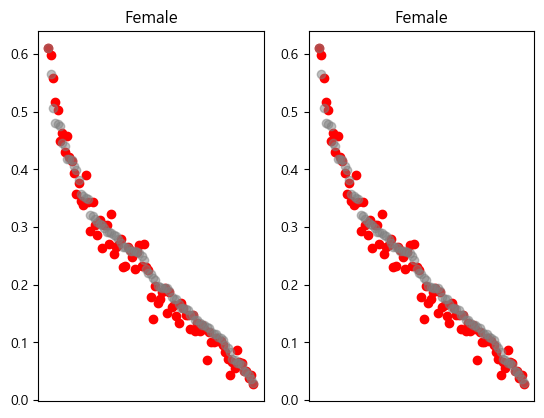

In [41]:
fig=plt.figure()

ax1=fig.add_subplot(1,2,1)
ax1.scatter(np.arange(len(df)),df['남자'],c='b')
ax1.scatter(np.arange(len(df)),df['전체'],c='grey',alpha=0.5)
ax1.set_xticks([])
ax1.set_title('Male')

ax2=fig.add_subplot(1,2,2)
ax2.scatter(np.arange(len(df)),df['여자'],c='r')
ax2.scatter(np.arange(len(df)),df['전체'],c='grey',alpha=0.5)
ax2.set_xticks([])
ax2.set_title('Female')

In [33]:
df2=df.loc[:,['상품','분류','남자']].copy().reset_index().drop('index',axis=1)
m_x=pd.Series(np.arange(len(df2)))
m_y=df2.loc[:,'남자']
m_coord=pd.concat([m_x,m_y],axis=1).to_numpy()

In [34]:
inertia_list=[]

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(m_coord)
    inertia_list.append(kmeans.inertia_)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

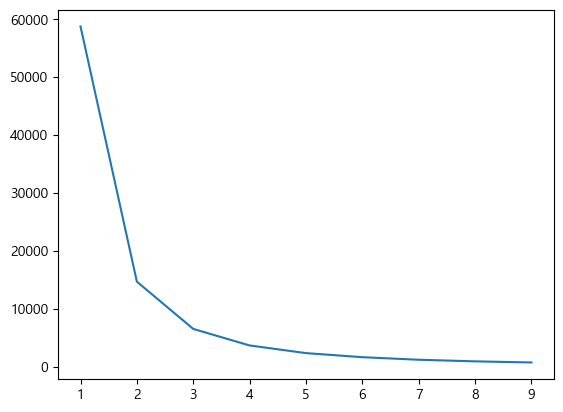

In [35]:
plt.plot(range(1,10),inertia_list)

k=3

In [36]:
kmeans_fr= KMeans(n_clusters=3, random_state=42).fit(m_coord)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


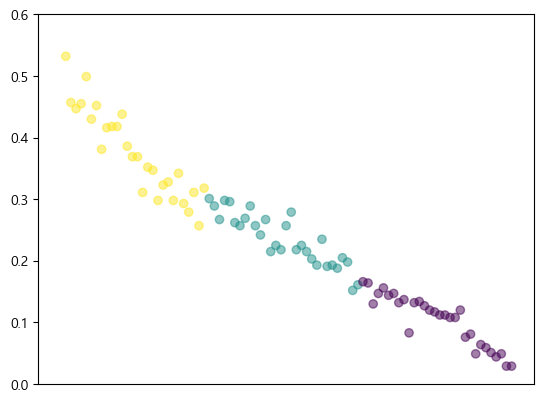

In [37]:
plt.scatter(np.arange(len(df)),df['남자'],alpha=0.5,c=kmeans_fr.labels_)
plt.xticks([])
plt.ylim([0,0.6])

#standard_line=[0.25]*len(df)
#plt.plot(np.arange(len(df)),standard_line,color='grey') #0.348

plt.show()

In [ ]:
df['남성_열세']=df['남자']-df['여자']
df_2=df.loc[df['전체']>=0.348].sort_values(by='남자',ascending=False)

m_mean=pd.DataFrame(df_2.groupby('분류')['남자'].mean())
m_num=df_2['분류'].value_counts().rename_axis('분류').to_frame('counts').sort_index()

m_mean['빈도']=m_num
m_mean['기대값']=m_mean['남자']*m_mean['빈도']
m_mean.sort_values(by='기대값',ascending=False,inplace=True)

print(m_mean)

In [ ]:
m_mean['기대값'].describe()

In [ ]:
m_mean.loc[:,['남자','기대값']].plot.bar(stacked=True,rot=45)

In [ ]:
sr_friendly=df_2.loc[df_2['분류']=='고령친화상품']
meal=df_2.loc[df_2['분류']=='식품외식']
beauty=df_2.loc[df_2['분류']=='의류미용']

male_topic=pd.concat([sr_friendly,meal,beauty],ignore_index=True)
male_topic.sort_values(by='남성_열세',ascending=False,inplace=True)
male_topic